In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv(r'C:\Users\timka\Downloads\housing.csv') 

In [2]:
print(df.head())

   id              date    price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   1  22/10/2014 00:00  1495000         4       3.25         3070     10375   
1   2  26/11/2014 00:00  1495000         4       3.75         3770      4000   
2   3  29/01/2015 00:00  1490000         4       2.50         2420     18480   
3   4  31/03/2015 00:00  1490000         3       3.50         4560     14608   
4   5  11/09/2014 00:00  1490000         5       3.50         3620      7821   

   floors waterfront     view  condition  grade  yr_built  zipcode      lat  \
0     2.0         No  No View    Average     10      1962    98004  47.5862   
1     2.5         No  No View  Very Good      9      1916    98122  47.6157   
2     1.0         No  No View       Good      9      1967    98004  47.6214   
3     2.0         No  Average    Average     12      1990    98034  47.6995   
4     2.0         No  Average    Average     10      1958    98040  47.5738   

      long  
0 -122.198  
1 -122.287  
2 -12

Plot price vs sqft_living

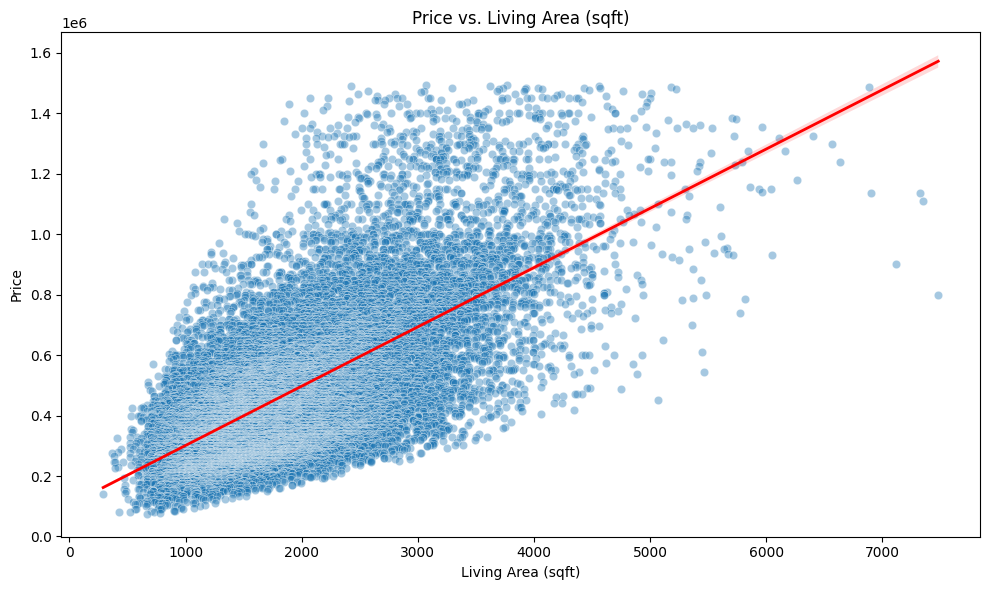

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.4)
sns.regplot(x='sqft_living', y='price', data=df, scatter=False, color='red', line_kws={"linewidth": 2})
plt.title('Price vs. Living Area (sqft)')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.tight_layout()

plt.savefig('price_vs_sqft_living.png', dpi=300)  # Saves to current working directory
plt.show()



This shows an upward trend of price with increase in sqft for living area

Ploting sqft_lot vs price

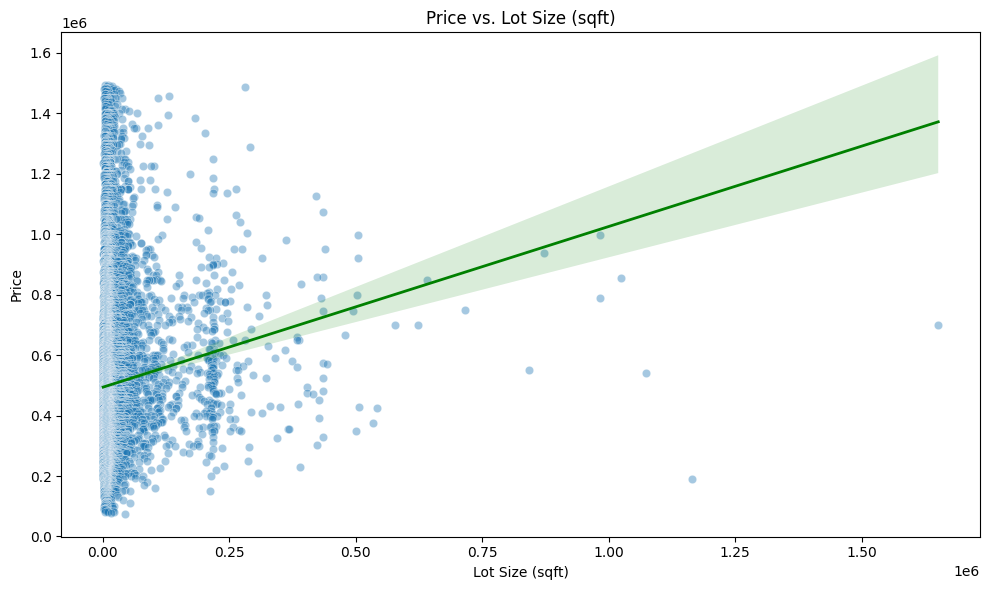

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_lot', y='price', data=df, alpha=0.4)
sns.regplot(x='sqft_lot', y='price', data=df, scatter=False, color='green', line_kws={"linewidth": 2})
plt.title('Price vs. Lot Size (sqft)')
plt.xlabel('Lot Size (sqft)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()



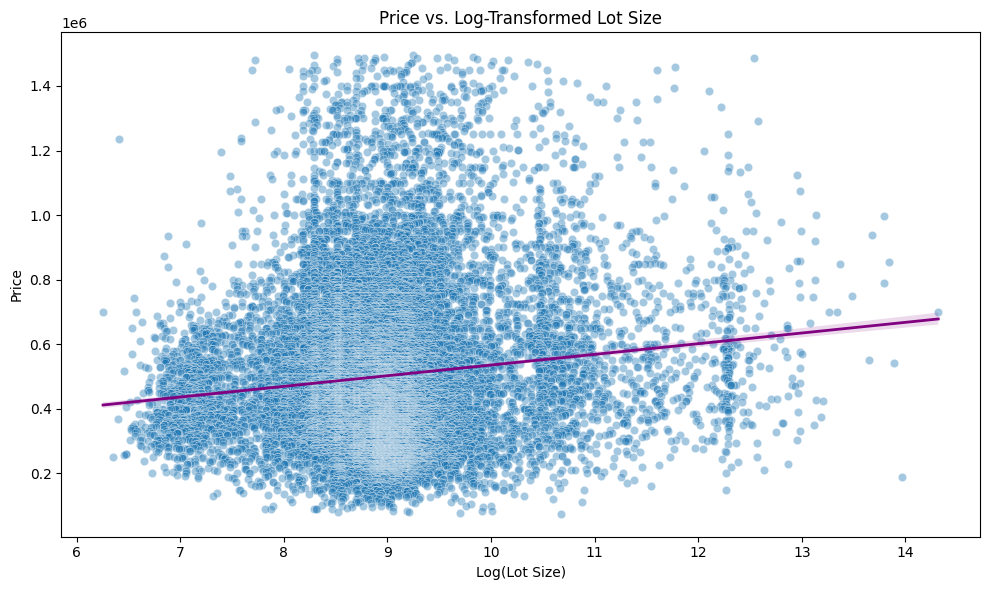

In [8]:
df['log_lot'] = np.log1p(df['sqft_lot'])  # log(1 + x) avoids log(0) issues

plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_lot', y='price', data=df, alpha=0.4)
sns.regplot(x='log_lot', y='price', data=df, scatter=False, color='purple', line_kws={"linewidth": 2})
plt.title('Price vs. Log-Transformed Lot Size')
plt.xlabel('Log(Lot Size)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


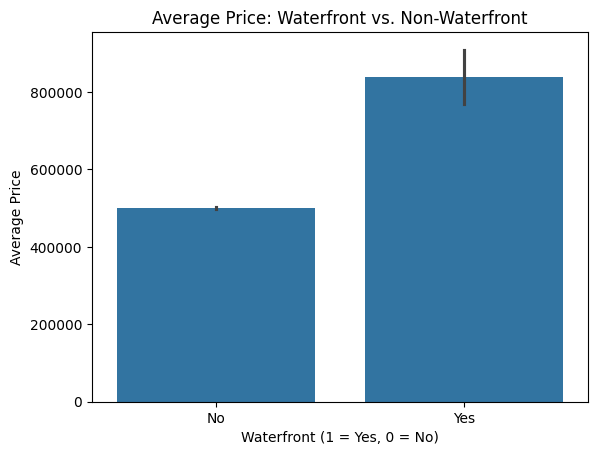

In [20]:
sns.barplot(x='waterfront', y='price', data=df, estimator=np.mean)
plt.title('Average Price: Waterfront vs. Non-Waterfront')
plt.xlabel('Waterfront (1 = Yes, 0 = No)')
plt.ylabel('Average Price')
plt.savefig("C:/Users/timka/Downloads/monthly_avg_price.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()


In [15]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['date'] = pd.to_datetime(df['date'])  # if not already done
df['month'] = df['date'].dt.month        # now you can safely group by 'month'

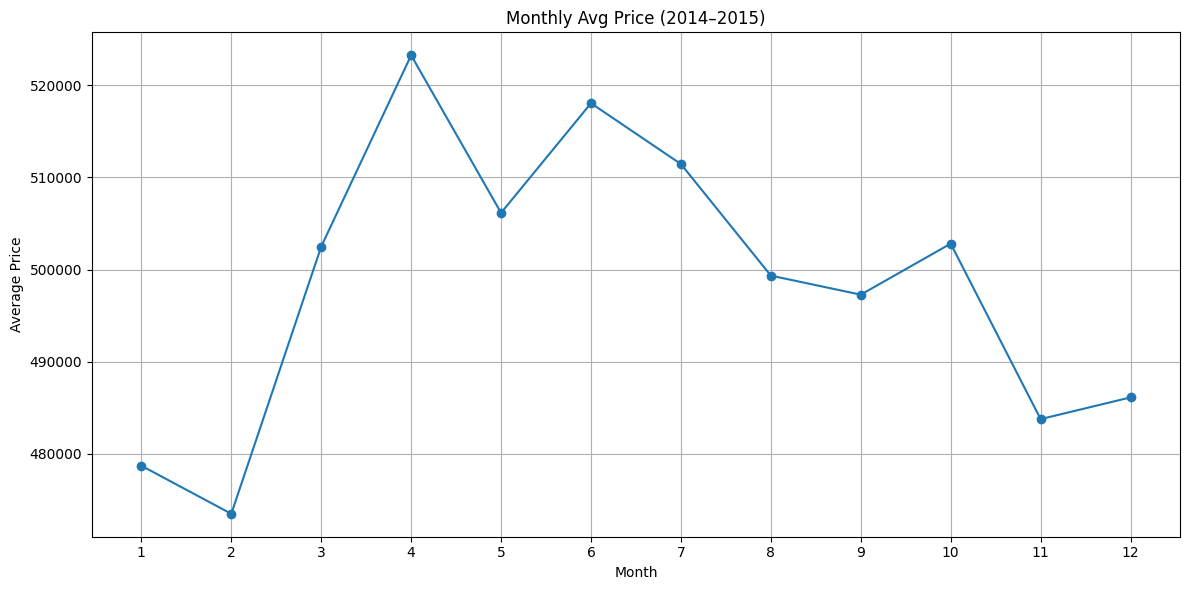

In [21]:
monthly_avg = df.groupby('month')['price'].mean()
import matplotlib.pyplot as plt

monthly_avg.plot(figsize=(12, 6), marker='o', title='Monthly Avg Price (2014–2015)')
plt.ylabel('Average Price')
plt.xlabel('Month')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.savefig("C:/Users/timka/Downloads/Monthly Avg Price(2014-2015.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

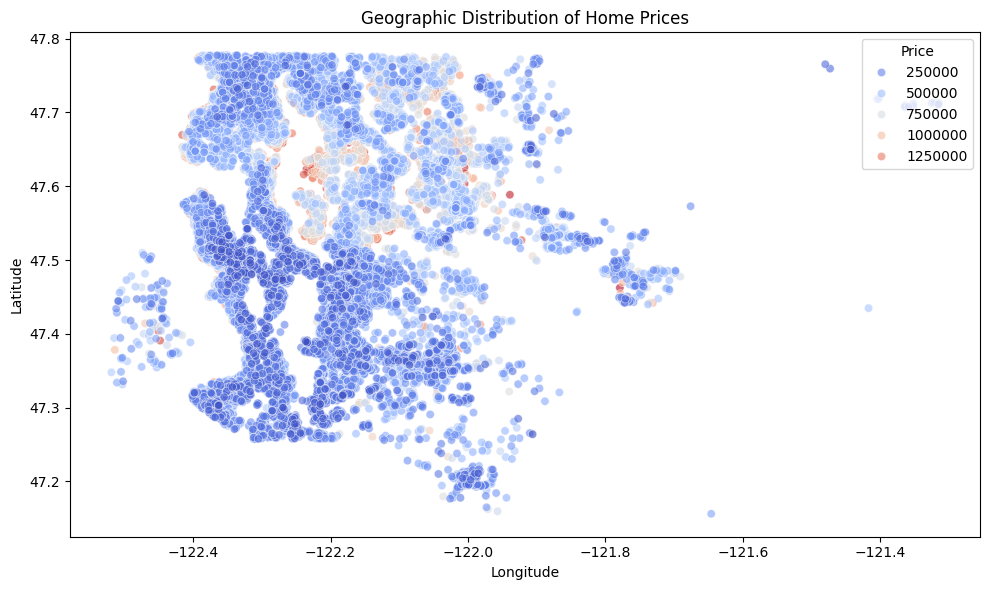

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', hue='price', data=df, palette='coolwarm', alpha=0.6)
plt.title('Geographic Distribution of Home Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price', loc='upper right')
plt.tight_layout()
plt.savefig("C:/Users/timka/Downloads/Geographic Distribution of Home Prices.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

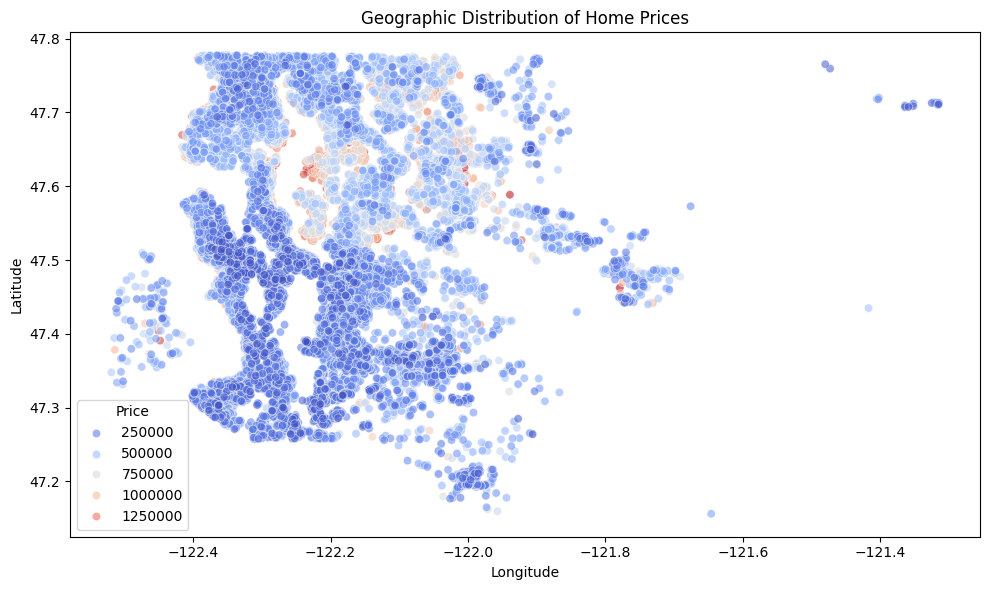

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', hue='price', data=df, palette='coolwarm', alpha=0.6)
plt.title('Geographic Distribution of Home Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price')
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd
import folium

# We'll filter top 5% most expensive homes
price_threshold = df['price'].quantile(0.95)
top_properties = df[df['price'] >= price_threshold]

In [26]:
# Initialize a folium map centered around your data
map_center = [top_properties['lat'].mean(), top_properties['long'].mean()]
price_map = folium.Map(location=map_center, zoom_start=11, tiles='CartoDB positron')

# Add markers for top properties
for _, row in top_properties.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        popup=f"${row['price']:,.0f}",
        color='crimson',
        fill=True,
        fill_opacity=0.7
    ).add_to(price_map)

# Display the map
price_map

In [27]:
# Define thresholds (33rd and 66th percentiles)
low_thresh = df['price'].quantile(0.33)
high_thresh = df['price'].quantile(0.66)

# Create a new column
def label_price_bracket(price):
    if price <= low_thresh:
        return 'Low'
    elif price <= high_thresh:
        return 'Mid'
    else:
        return 'High'

df['price_bracket'] = df['price'].apply(label_price_bracket)